<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW3Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selected Features: ['mean concavity' 'worst concavity']
Accuracy: 0.8596
Precision: 0.8500
Recall: 0.9444
F1 Score: 0.8947
Confusion Matrix:
 [[ 45  18]
 [  6 102]]


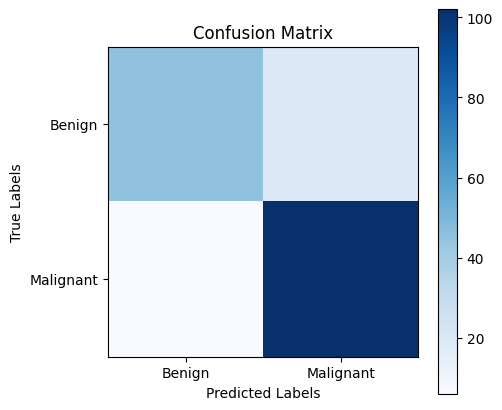

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')

# Apply Recursive Feature Elimination (RFE) to select top 2 features
selector = RFE(model, n_features_to_select=2)
selector.fit(X_train, y_train)

# Get selected features
selected_features = feature_names[selector.support_]
print("Selected Features:", selected_features)

# Train the logistic regression model using only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.show()